<a href="https://colab.research.google.com/github/Sath1607/RiskGame/blob/master/New_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# use seaborn plotting style defaults
import seaborn as sns; sns.set()
from google.colab import files

In [0]:
#upload files into Colaboratory
uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


In [0]:
#read cvs file into dataframe
df = pd.read_csv('Pokemon.csv', index_col=0)
print(df.head())

            Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
Name                                                           
Bulbasaur     318  45      49       49       65       65     45
Ivysaur       405  60      62       63       80       80     60
Venusaur      525  80      82       83      100      100     80
Charmander    309  39      52       43       60       50     65
Charmeleon    405  58      64       58       80       65     80


In [0]:
m,n=df.shape #size of data
X = df.iloc[:,0:n].values # Feature matrix
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) #normalize data

In [0]:
#normalize data
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, Bulbasaur to Dewgong
Data columns (total 7 columns):
Total      87 non-null float64
HP         87 non-null float64
Attack     87 non-null float64
Defense    87 non-null float64
Sp. Atk    87 non-null float64
Sp. Def    87 non-null float64
Speed      87 non-null float64
dtypes: float64(7)
memory usage: 5.4+ KB


In [0]:
#bservations and variables
observations = list(df.index)
variables = list(df.columns)


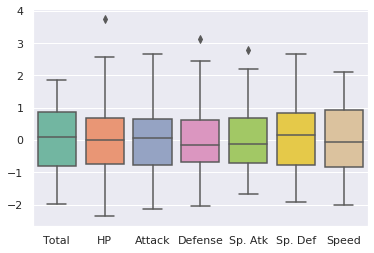

In [0]:
#visualisation of the data using a box plot
sns.boxplot(data=df, orient="v", palette="Set2")

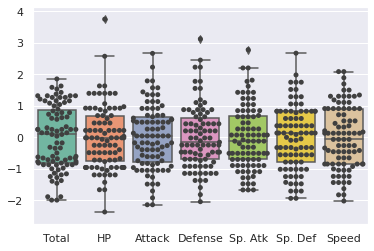

In [0]:
##Use swarmplot() to show the datapoints on top of the boxes:
plt. figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.swarmplot(data=df, color=".25")    


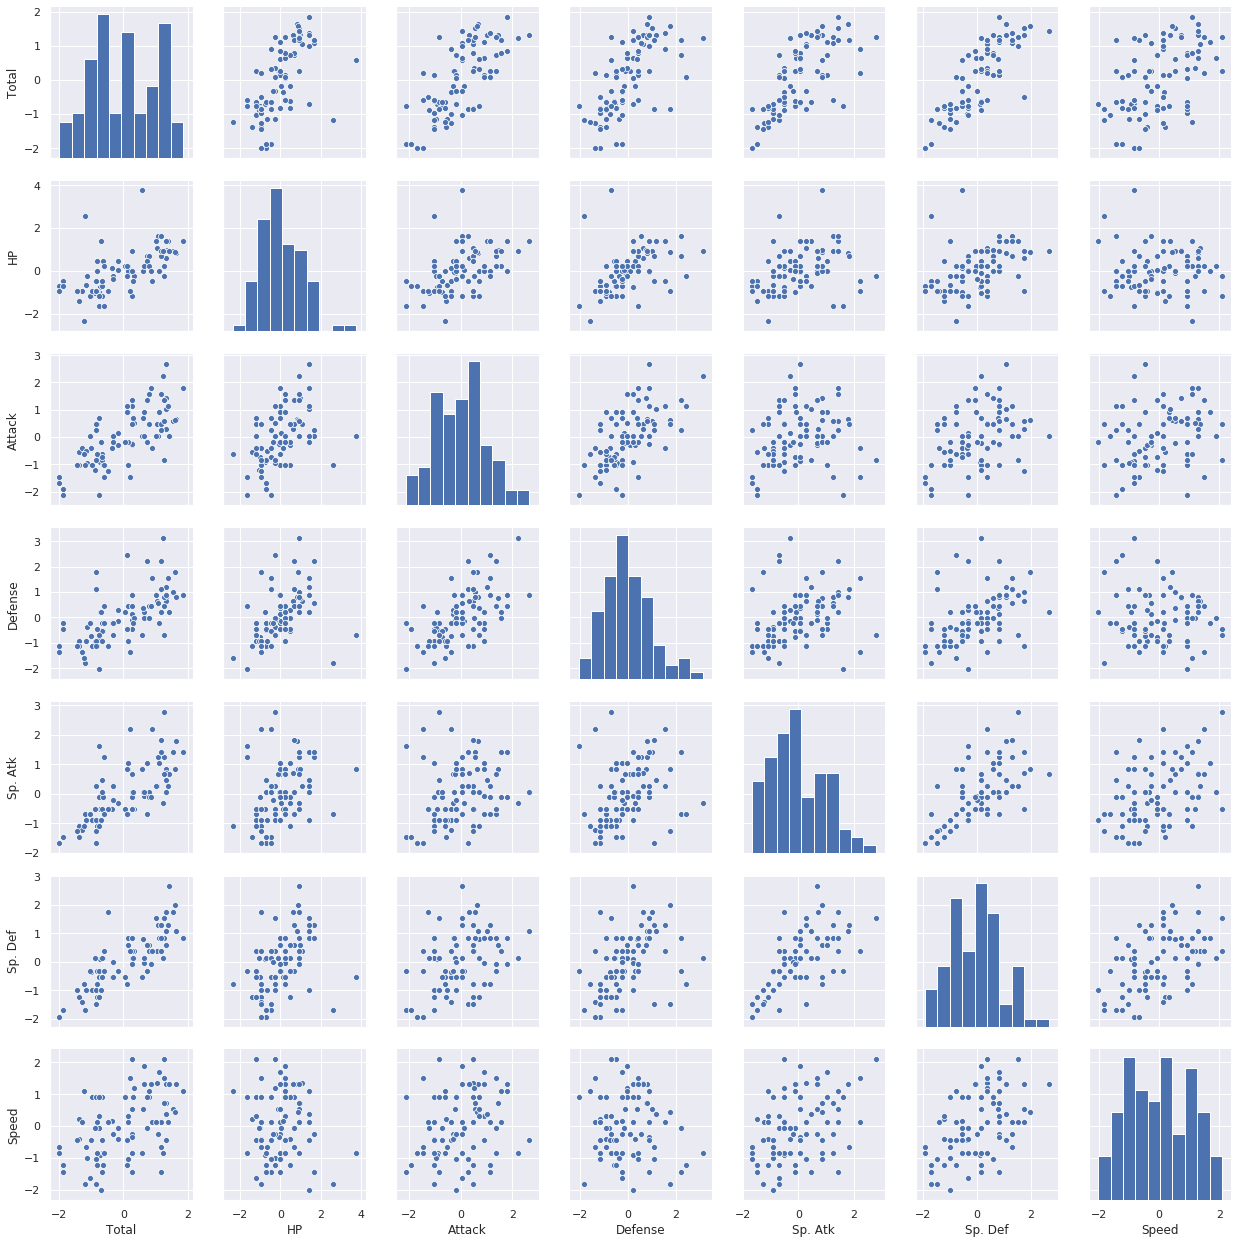

In [0]:
#pairplot
sns.pairplot(df)

Text(0.5, 1, 'Covariance matrix')

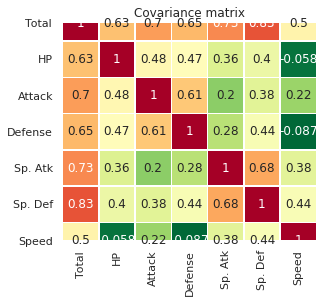

In [0]:
#Covariance
dfc = df - df.mean() #centered data
plt. figure()
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=True,labeltop=False)
plt.title('Covariance matrix')

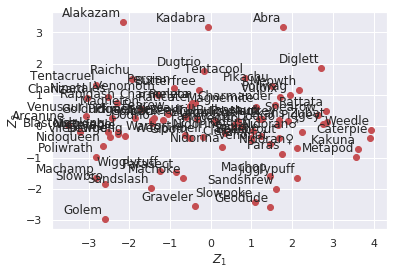

In [0]:
#Principal component analysis
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

plt. figure()
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


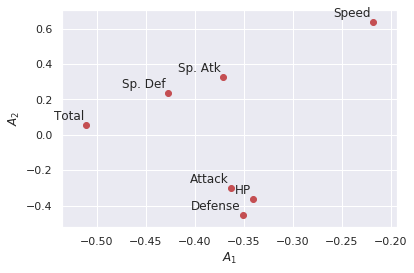

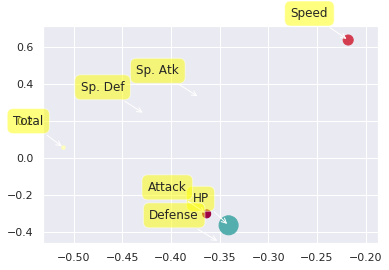

In [0]:
#Eigenvectors
A = pca.components_.T 
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')
    
plt. figure()
plt.scatter(A[:, 0],A[:, 1],marker='o',c=A[:, 2],s=A[:, 3]*500,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
#Eigenvalues
Lambda = pca.explained_variance_ 


Text(0, 0.5, 'Explained variance')

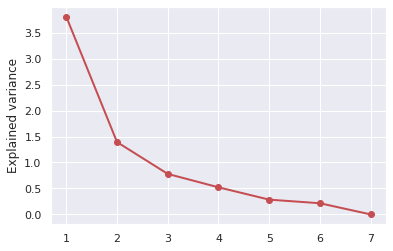

In [0]:
#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda, 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
#plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0, 0.5, 'Cumulative explained variance')

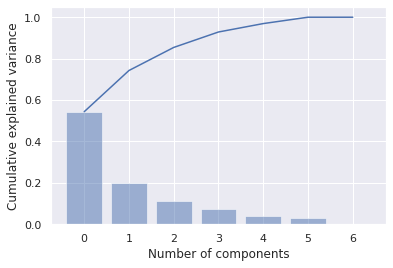

In [0]:
#Explained variance
ell = pca.explained_variance_ratio_
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


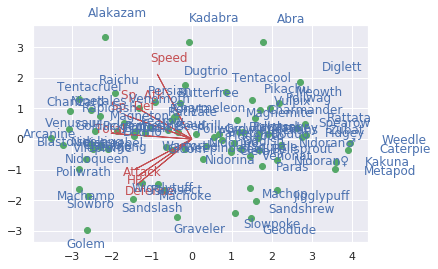

In [0]:
#Biplot
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='r')

for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='g', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

Text(0.5, 1, 'Principal components')

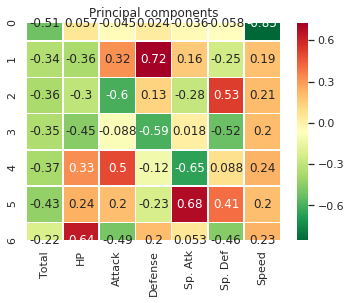

In [0]:
plt.figure()
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')
